In [2]:
from skimage.metrics import mean_squared_error, structural_similarity
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt


### Baked VAE in SD

In [3]:
img_dir = "baked VAE/png/"
imgs = os.listdir(img_dir)
print(imgs)

['01.png', '02.png', '03.png', '04.png', '05.png', '06.png', '07.png', '08.png', '09.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '20.png']


In [4]:
mse_consecutive, mse_accumulated, fid_consecutive, ssim_consecutive, ssim_accumulated, fid_accumulated = [], [], [], [], [], []

original = Image.open(img_dir + imgs[0])
original = original.convert('RGB')
array_original = np.array(original)
image_original_gray = np.array(original.convert('L'))

for i in range(len(imgs)-1):
    image1 = Image.open(img_dir + imgs[i])
    image2 = Image.open(img_dir + imgs[i+1])
    image1 = image1.convert('RGB')
    image2 = image2.convert('RGB')

    array1 = np.array(image1)
    array2 = np.array(image2)
    image1_gray = np.array(image1.convert('L'))
    image2_gray = np.array(image2.convert('L'))

    mse = mean_squared_error(array1, array2)
    ssim = structural_similarity(image1_gray, image2_gray, data_range=image2_gray.max() - image2_gray.min())
    mse_original = mean_squared_error(array1, array_original)
    ssim_original = structural_similarity(image_original_gray, image1_gray, data_range=image1_gray.max() - image1_gray.min())

    mse_consecutive.append(mse)
    ssim_consecutive.append(ssim)
    mse_accumulated.append(mse_original)
    ssim_accumulated.append(ssim_original)

### Control Net - pix2pix

In [5]:
img_dir = "controlnet/p2p/"
imgs = os.listdir(img_dir)
print(imgs)

['ComfyUI_00000_.png', 'ComfyUI_00001_.png', 'ComfyUI_00002_.png', 'ComfyUI_00003_.png', 'ComfyUI_00004_.png', 'ComfyUI_00005_.png', 'ComfyUI_00006_.png', 'ComfyUI_00007_.png', 'ComfyUI_00008_.png', 'ComfyUI_00009_.png', 'ComfyUI_00010_.png']


In [6]:
mse_consecutive_cn, mse_accumulated_cn, fid_consecutive_cn, ssim_consecutive_cn, ssim_accumulated_cn, fid_accumulated_cn = [], [], [], [], [], []

original = Image.open(img_dir + imgs[0])
original = original.convert('RGB')
array_original = np.array(original)
image_original_gray = np.array(original.convert('L'))

for i in range(len(imgs)-1):
    image1 = Image.open(img_dir + imgs[i])
    image2 = Image.open(img_dir + imgs[i+1])
    image1 = image1.convert('RGB')
    image2 = image2.convert('RGB')

    array1 = np.array(image1)
    array2 = np.array(image2)
    image1_gray = np.array(image1.convert('L'))
    image2_gray = np.array(image2.convert('L'))

    mse = mean_squared_error(array1, array2)
    ssim = structural_similarity(image1_gray, image2_gray, data_range=image2_gray.max() - image2_gray.min())
    mse_original = mean_squared_error(array1, array_original)
    ssim_original = structural_similarity(image_original_gray, image1_gray, data_range=image1_gray.max() - image1_gray.min())

    mse_consecutive_cn.append(mse)
    ssim_consecutive_cn.append(ssim)
    mse_accumulated_cn.append(mse_original)
    ssim_accumulated_cn.append(ssim_original)

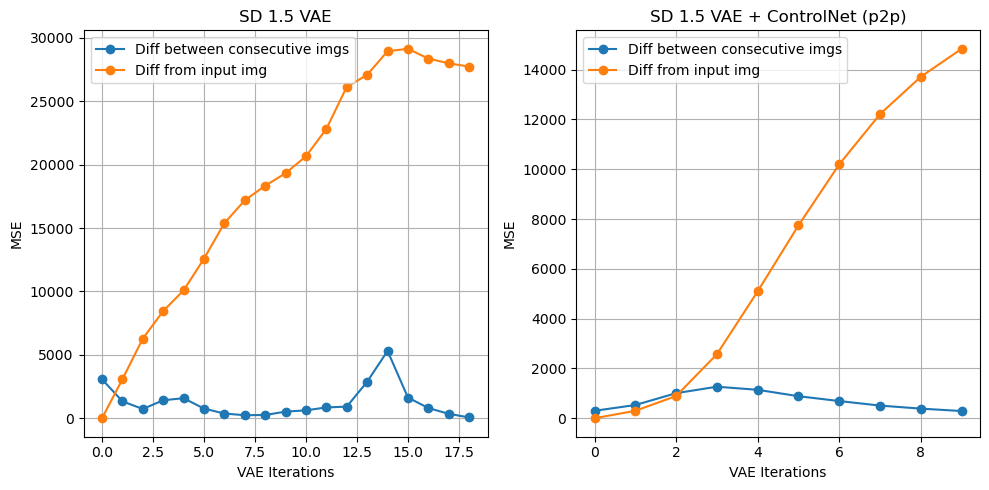

In [10]:
plt.figure(figsize=(10, 5))

# Plotting MSE - baked VAE
plt.subplot(1, 2, 1)
plt.plot(mse_consecutive, '-o', label='Diff between consecutive imgs')
plt.plot(mse_accumulated, '-o', label='Diff from input img')
plt.title('SD 1.5 VAE')
plt.xlabel('VAE Iterations')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()

# Plotting MSE - baked VAE + controlnet(p2p)
plt.subplot(1, 2, 2)
plt.plot(mse_consecutive_cn, '-o', label='Diff between consecutive imgs')
plt.plot(mse_accumulated_cn, '-o', label='Diff from input img')
plt.title('SD 1.5 VAE + ControlNet (p2p)')
plt.xlabel('VAE Iterations')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

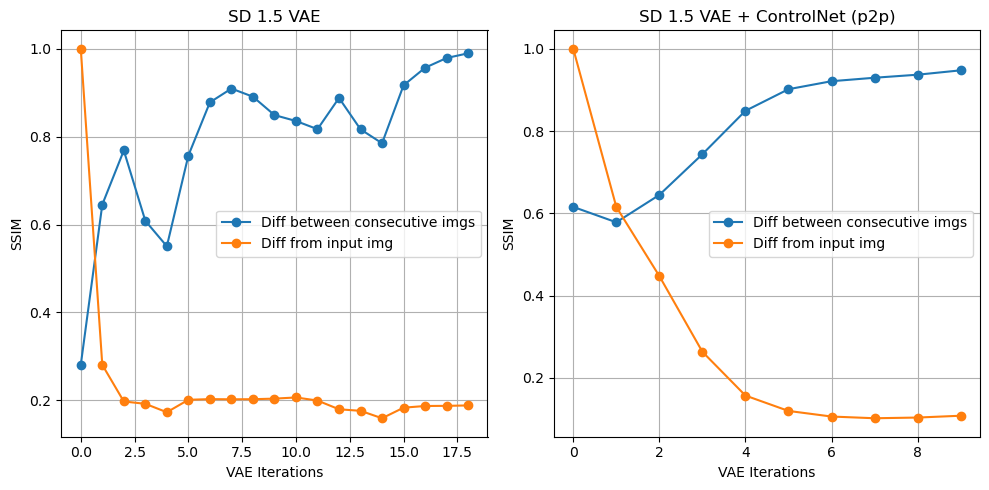

In [12]:
plt.figure(figsize=(10, 5))

# Plotting SSIM
plt.subplot(1, 2, 1)
plt.plot(ssim_consecutive, '-o', label='Diff between consecutive imgs')
plt.plot(ssim_accumulated, '-o', label='Diff from input img')
plt.title('SD 1.5 VAE')
plt.xlabel('VAE Iterations')
plt.ylabel('SSIM')
plt.grid(True)
plt.legend()

# Plotting SSIM
plt.subplot(1, 2, 2)
plt.plot(ssim_consecutive_cn, '-o', label='Diff between consecutive imgs')
plt.plot(ssim_accumulated_cn, '-o', label='Diff from input img')
plt.title('SD 1.5 VAE + ControlNet (p2p)')
plt.xlabel('VAE Iterations')
plt.ylabel('SSIM')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()